# Problem Statement

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner
project with readily available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.


# Load the dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing and EDA

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 6) <class 'pandas.core.frame.DataFrame'> (891,) <class 'pandas.core.series.Series'>


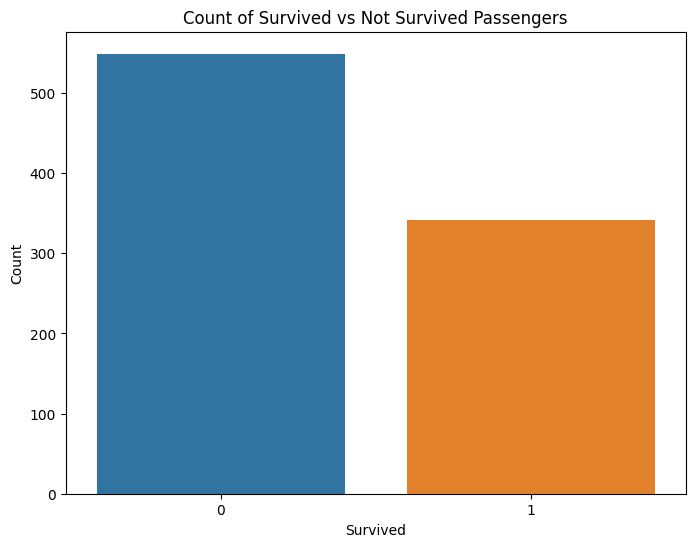

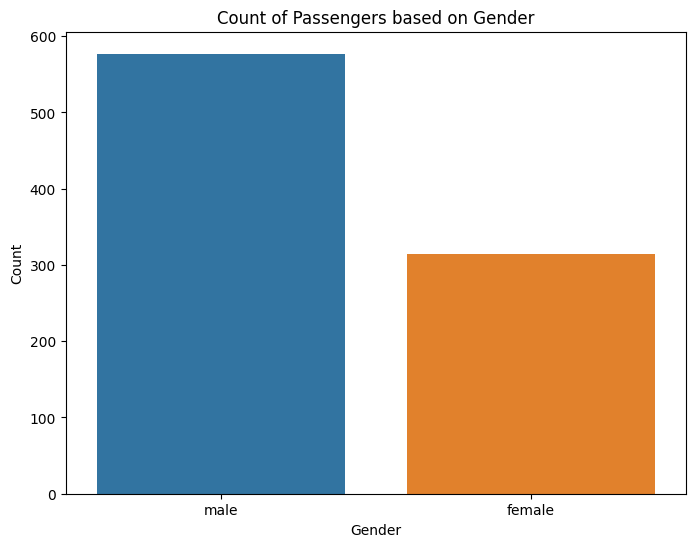

In [6]:
titanic_ds = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
print(titanic_ds.isna().sum())

titanic_ds.dropna(subset=['Embarked'])
median_age = titanic_ds['Age'].median()
titanic_ds['Age'] = titanic_ds['Age'].fillna(median_age)

Y = titanic_ds['Survived']

titanic_ds['family_members'] = titanic_ds['SibSp']+titanic_ds['Parch']

X = titanic_ds.drop(columns=['PassengerId','Survived','Name','Ticket','SibSp','Parch','Cabin'])
X_encoded = pd.get_dummies(X,columns=['Sex', 'Embarked'], drop_first=True)
X_encoded.head()

print(X.shape, type(X), Y.shape, type(Y))

# Plotting counts of survived vs not survived passengers
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_ds)
plt.title('Count of Survived vs Not Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plotting counts of passengers based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=titanic_ds)
plt.title('Count of Passengers based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Training and Testing of the Model

Accuracy score:  0.8044692737430168
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



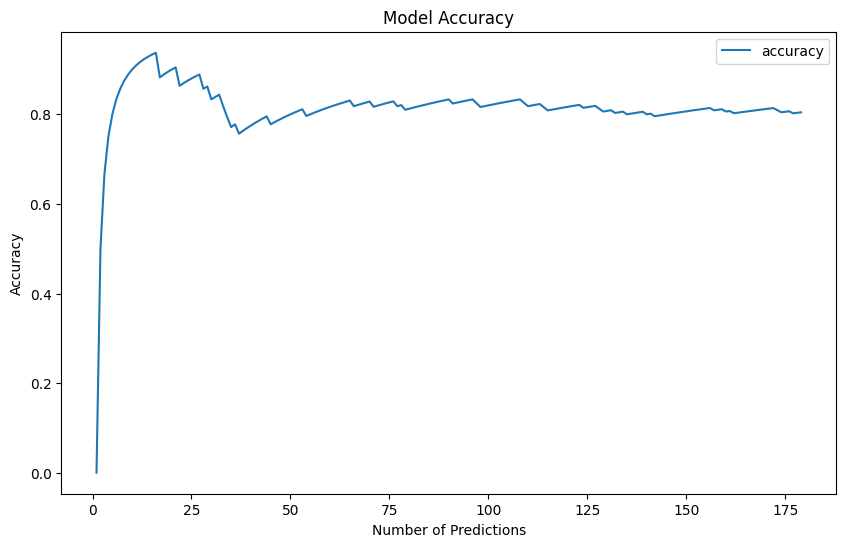

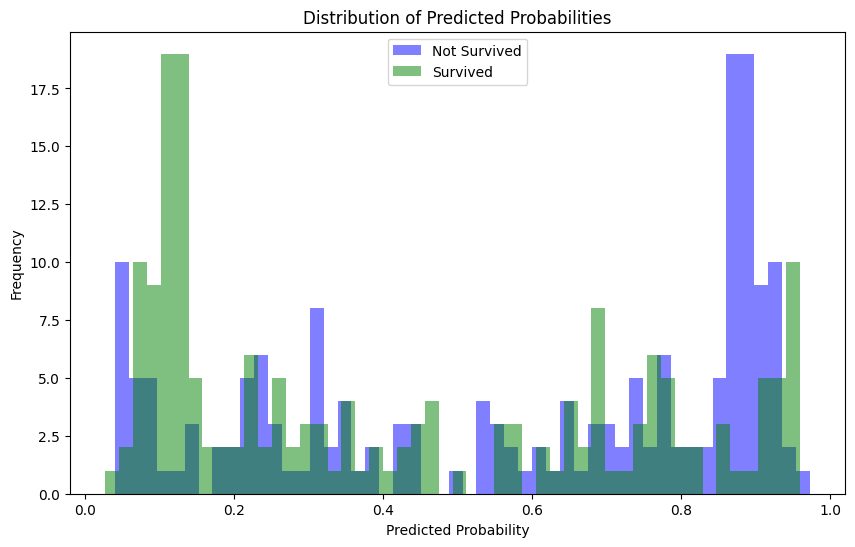

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X_encoded,Y,test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

print("Accuracy score: ",accuracy_score(Y_test,y_pred))
print("Classification report:\n",classification_report(Y_test,y_pred))

# Plotting Accuracy and Loss Curves
# Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(y_pred) + 1), [accuracy_score(Y_test[:i], y_pred[:i]) for i in range(1, len(y_pred) + 1)], label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Number of Predictions')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict probabilities
from sklearn.metrics import log_loss

Y_proba = model.predict_proba(X_test)

# Plotting Predicted Probabilities Distribution
plt.figure(figsize=(10, 6))
plt.hist(Y_proba[:, 0], bins=50, alpha=0.5, color='blue', label='Not Survived')
plt.hist(Y_proba[:, 1], bins=50, alpha=0.5, color='green', label='Survived')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()